<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/n_layerNeuralNetworks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
train = pd.read_csv("/content/drive/MyDrive/ML/Classification_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML/Classification_test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(30000, 785)

In [ ]:
train.shape

(30000, 785)

In [ ]:
test.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = np.array(train)
m,n = train.shape

data_test = train[0:1000].T
y_cv = data_test[0]
x_cv = data_test[1:n]

data_train = train[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]

In [4]:
x_cv = x_cv/255.0
x_train = x_train/255.0

In [5]:
def ReLU(z):
  return np.maximum(0,z)

In [6]:
def derivative_ReLU(z):
  return z>0

In [7]:
def sigmoid(z):

    s = 1.0 / (1.0 + np.exp(-z))

    return s

In [8]:
def derivative_sigmoid(x):
    return sigmoid(x)*(1- sigmoid(x))

In [9]:
def softmax(z):
    z_exp = np.exp(z - np.max(z, axis=0, keepdims=True))
    return z_exp / np.sum(z_exp, axis=0, keepdims=True)

In [10]:
def initialize(n,N):
  W=[]
  B=[]
  w1= np.random.rand(N[0],784)-0.5
  b1= np.random.rand(N[0],1)-0.5
  W.append(w1)
  B.append(b1)
  for i in range(n-1):
    if i == n-2:
      w = np.random.rand(10,N[i])-0.5
      b= np.random.rand(10,1)-0.5
      W.append(w)
      B.append(b)
    else:
      w = np.random.rand(N[i+1],N[i])-0.5
      b= np.random.rand(N[i+1],1)-0.5
      W.append(w)
      B.append(b)

  return W,B

In [11]:
def forward_prop(W,B,n,x):
  Z = [[] for _ in range(n)]
  A = [[] for _ in range(n)]
  for i in range(n):
    if i==0:
      z1= W[0].dot(x) + B[0]
      a1 = ReLU(z1)
      Z[0]=z1
      A[0]=a1
    elif i== n-1:
      Z[i]=W[i].dot(A[i-1])+B[i]
      A[i] = softmax(Z[i])
    elif i== n-2:
      Z[i]=W[i].dot(A[i-1])+B[i]
      A[i] = Z[i]
    elif i%2!=0:
      Z[i]=W[i].dot(A[i-1])+B[i]
      A[i] = sigmoid(Z[i])
    else:
      Z[i] = W[i].dot(A[i-1])+B[i]
      A[i] = ReLU(Z[i])

  return Z,A

In [12]:
def one_hot_encoding(y):
  y_one_hot = np.zeros((y.size,y.max()+1))
  y_one_hot[np.arange(y.size),y] = 1
  y_one_hot = y_one_hot.T
  return y_one_hot

In [13]:
def back_prop(Z,A,W,x,y,n):
  m=y.size
  y_one_hot = one_hot_encoding(y)
  dZ = [[] for _ in range(n)]
  dW = [[] for _ in range(n)]
  dB = [[] for _ in range(n)]

  for i in reversed(range(n)):
        if i == n - 1:
            dZ[i] = A[i] - y_one_hot
            dW[i] = 1 / m * dZ[i].dot(A[i - 1].T)
            dB[i] = 1 / m * np.sum(dZ[i], axis=1, keepdims=True)
        elif i == n - 2:
            dZ[i] = W[i + 1].T.dot(dZ[i + 1])
            dW[i] = 1 / m * dZ[i].dot(A[i - 1].T)
            dB[i] = 1 / m * np.sum(dZ[i], axis=1, keepdims=True)
        elif i == 0:
            dZ[i] = W[i + 1].T.dot(dZ[i + 1]) * derivative_ReLU(Z[i])
            dW[i] = 1 / m * dZ[i].dot(x.T)
            dB[i] = 1 / m * np.sum(dZ[i], axis=1, keepdims=True)
        elif i%2!=0:
            dZ[i] = W[i + 1].T.dot(dZ[i + 1]) * derivative_sigmoid(Z[i])
            dW[i] = 1 / m * dZ[i].dot(A[i - 1].T)
            dB[i] = 1 / m * np.sum(dZ[i], axis=1, keepdims=True)
        else:
            dZ[i] = W[i + 1].T.dot(dZ[i + 1]) * derivative_ReLU(Z[i])
            dW[i] = 1 / m * dZ[i].dot(A[i - 1].T)
            dB[i] = 1 / m * np.sum(dZ[i], axis=1, keepdims=True)

  return dW,dB

In [14]:
def update_parameters(W,B,dW,dB,n,alpha):
  for i in range(n):
    W[i] = W[i] - alpha * dW[i]
    B[i] = B[i] - alpha * dB[i]

  return W,B

In [15]:
def predictions(A):
  return np.argmax(A, axis=0)

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

In [16]:
def accuracy(pred,y):
  print(pred,y)
  return np.sum(pred==y)/y.size

In [20]:
def gradient_descent(x,y,n,N,alpha, iterations):
  W,B = initialize(n,N)
  for i in range(iterations):
    Z,A = forward_prop(W,B,n,x)
    dW,dB = back_prop(Z,A,W,x,y,n)
    W,B = update_parameters(W,B,dW,dB,n,alpha)

    if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}")
            preds = predictions(A[-1])

            print(f"Accuracy {accuracy(preds,y)}")

  return W,B

N will have size n-1

In [21]:
n=4
N=[64,36,16]

In [22]:
W,B = gradient_descent(x_train,y_train,n,N,0.1, 500)

Iteration    0
[4 4 4 ... 4 4 4] [9 5 9 ... 9 3 9]
Accuracy 0.07434482758620689
Iteration   50
[0 5 9 ... 9 7 8] [9 5 9 ... 9 3 9]
Accuracy 0.5580344827586207
Iteration  100
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.7438620689655172
Iteration  150
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.8109655172413793
Iteration  200
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.8459655172413794
Iteration  250
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.867551724137931
Iteration  300
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.8822758620689655
Iteration  350
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.8933103448275862
Iteration  400
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.9021724137931034
Iteration  450
[9 5 9 ... 9 3 8] [9 5 9 ... 9 3 9]
Accuracy 0.9092413793103449


In [23]:
def prediction_maker(x,W,B,n):
  Z,A = forward_prop(W,B,n,x)
  pred = predictions(A[n-1])
  return pred

In [36]:
def predict_test(index,W,B,n):
  image = x_cv[:,index,None]
  pred = prediction_maker(image,W,B,n)
  label = y_cv[index]
  print(f"Prediction: {pred[0]} Label: {label}")
  pixels = image.reshape((28,28))*255.0

  plt.imshow(pixels)
  plt.axis("off")
  plt.show()

In [42]:
y_pred = prediction_maker(x_cv,W,B,n)

In [43]:
accuracy(y_pred,y_cv)

[0 8 1 7 7 8 6 6 3 0 2 5 9 8 1 0 7 9 8 6 3 3 4 1 6 4 7 1 9 7 8 8 9 6 8 5 5
 2 1 3 7 6 6 9 4 2 2 3 6 2 0 6 3 8 3 0 6 5 2 0 7 5 0 6 3 0 2 5 5 7 4 4 8 9
 8 9 7 1 5 3 5 3 7 4 5 5 9 4 3 9 3 5 8 8 9 2 8 4 4 5 2 2 8 9 9 5 8 8 4 0 3
 7 8 7 2 6 4 4 3 4 1 3 6 8 3 3 8 5 2 2 0 3 4 1 0 8 5 5 9 5 5 7 7 5 7 5 8 0
 0 5 7 0 1 8 0 4 3 2 5 1 9 2 0 6 2 9 5 0 6 0 4 9 5 7 7 5 3 4 6 7 8 8 7 5 0
 8 8 4 3 5 4 3 4 4 8 6 2 4 3 2 2 4 8 5 1 2 1 6 6 0 7 9 6 4 9 9 2 3 6 3 9 0
 2 2 5 8 7 3 7 3 4 4 7 9 1 4 9 5 1 2 2 3 2 0 4 0 2 9 5 8 0 5 9 6 4 8 6 0 0
 0 0 5 8 7 8 6 9 5 9 4 7 9 2 2 9 3 6 9 1 5 8 6 0 3 0 2 1 7 9 9 1 0 4 8 0 9
 4 8 7 3 5 0 7 5 6 9 3 1 9 8 1 5 4 0 6 3 1 6 8 7 7 1 8 4 6 1 7 9 5 0 2 0 5
 0 5 7 3 6 9 3 3 3 6 8 1 9 8 0 7 5 1 9 2 4 6 9 1 7 3 0 9 9 4 0 5 8 7 1 2 4
 4 6 5 3 3 2 7 2 5 3 9 7 4 6 5 8 5 4 0 4 3 7 3 0 7 5 8 4 5 5 2 9 1 1 8 3 4
 9 1 6 3 6 2 9 9 3 4 2 1 6 6 3 4 7 7 7 5 2 3 7 6 2 9 8 1 4 1 6 2 7 0 1 8 5
 1 3 5 3 9 7 5 0 1 5 6 9 4 2 6 6 4 1 7 7 2 9 4 0 3 4 7 9 2 0 1 1 6 4 6 9 6
 9 5 4 9 3 1 6 7 3 2 0 6 

0.903

Prediction: 6 Label: 6


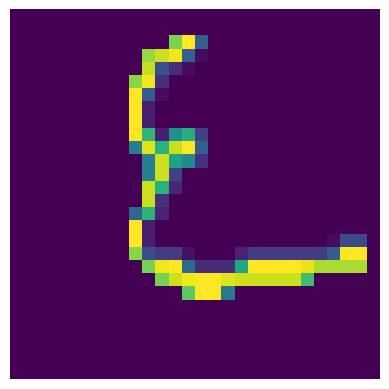

In [46]:
predict_test(768,W,B,n)

In [ ]:
test = np.array(test)
m,n = train.shape

y_test = test[0].T
x_test = test[1:n].T

# Source Code

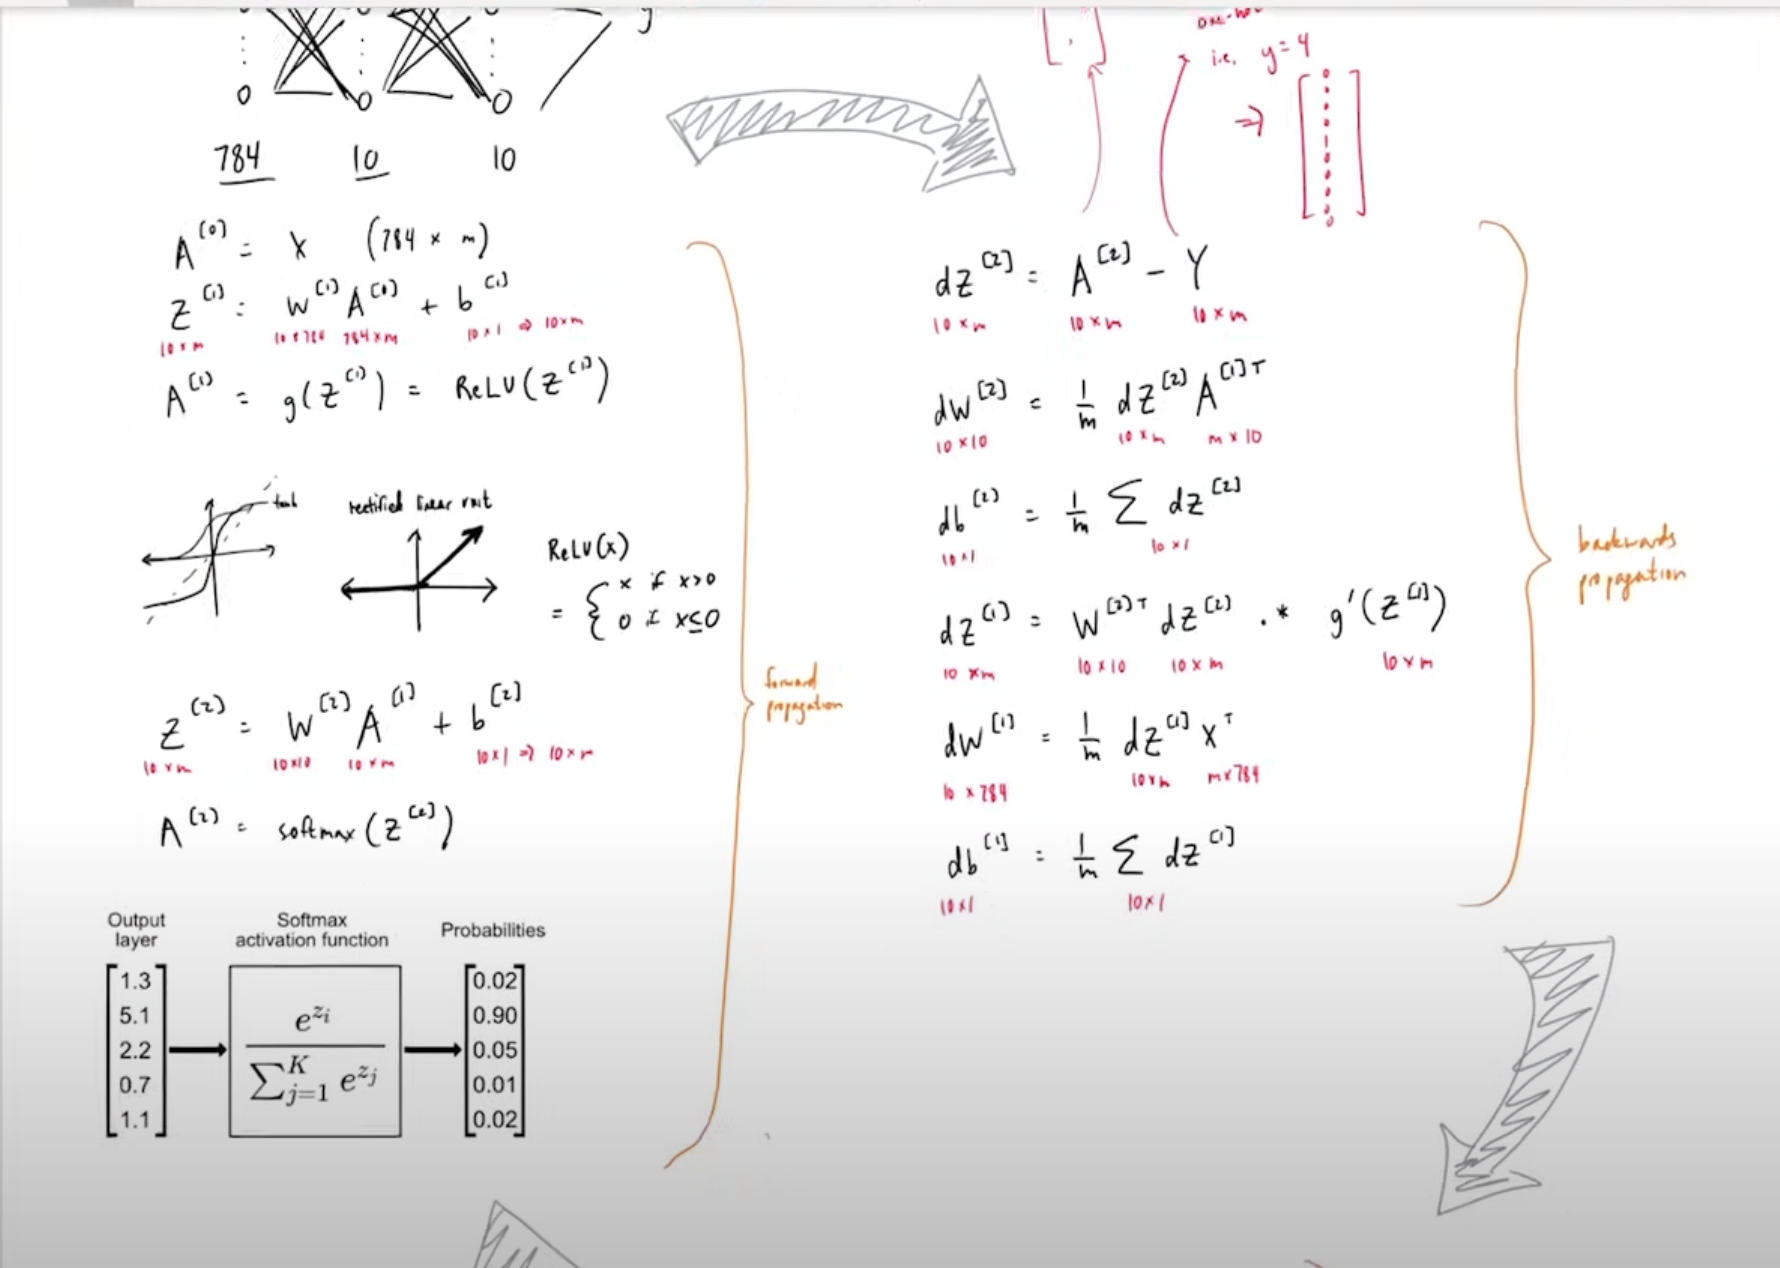

In [ ]:
def initialize():
  w1= np.random.rand(10,784)-0.5
  b1= np.random.rand(10,1)-0.5
  w2= np.random.rand(10,10)-0.5
  b2= np.random.rand(10,1)-0.5

  return w1,b1,w2,b2

In [ ]:
def forward_prop(w1,b1,w2,b2,x):
  z1= w1.dot(x) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1)+b2
  a2 = softmax(z2)

  return z1,a1,z2,a2

In [ ]:
def one_hot_encoding(y):
  y_one_hot = np.zeros((y.size,y.max()+1))
  y_one_hot[np.arange(y.size),y] = 1
  y_one_hot = y_one_hot.T
  return y_one_hot

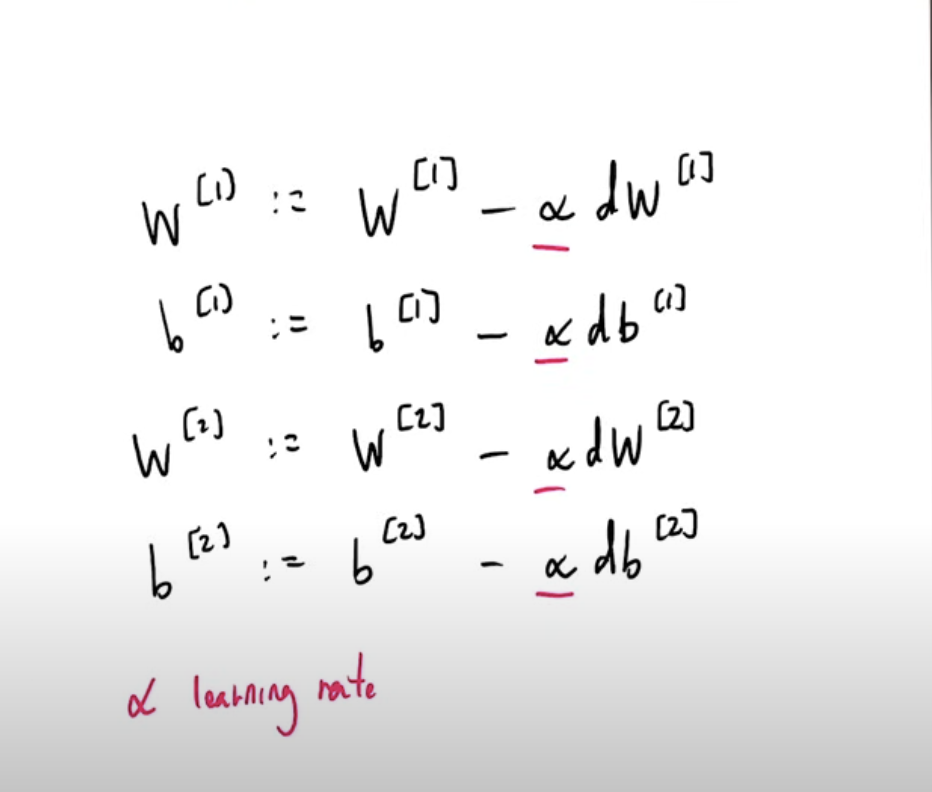

In [ ]:
def back_prop(z1,a1,z2,a2,w2,x,y):
  m=y.size
  y_one_hot = one_hot_encoding(y)
  dz2 = a2-y_one_hot
  dw2 = 1/m * dz2.dot(a1.T)
  db2 = 1/m * np.sum(dz2)
  dz1 = (w2.T).dot(dz2) * derivative_ReLU(z1)
  dw1 = 1/m * dz1.dot(x.T)
  db1 = 1/m * np.sum(dz1)

  return dw1,db1,dw2,db2

In [ ]:
def update_parameters(w1,b1,w2,b2,dj_dw1,dj_db1,dj_dw2,dj_db2,alpha):
  w1 = w1 - alpha * dj_dw1
  b1 = b1 - alpha * dj_db1
  w2 = w2 - alpha * dj_dw2
  b2 = b2 - alpha * dj_db2
  return w1,b1,w2,b2

In [ ]:
def predictions(a2):
  return np.argmax(a2,0)

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

In [ ]:
def accuracy(pred,y):
  print(pred,y)
  return np.sum(pred==y)/y.size

In [ ]:
def gradient_descent(x,y,alpha, iterations):
  w1,b1,w2,b2 = initialize()
  for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
    dj_dw1,dj_db1,dj_dw2,dj_db2 = back_prop(z1,a1,z2,a2,w2,x,y)
    w1,b1,w2,b2 = update_parameters(w1,b1,w2,b2,dj_dw1,dj_db1,dj_dw2,dj_db2,alpha)

    if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}")
            preds = predictions(a2)

            print(f"Accuracy {accuracy(preds,y)}")

  return w1, b1, w2, b2

In [ ]:
w1, b1, w2, b2 = gradient_descent(x_train,y_train,0.005, 500)

Iteration    0
[9 9 3 ... 3 3 4] [9 5 9 ... 9 3 9]
Accuracy 0.10793103448275862
Iteration   50
[9 9 1 ... 3 3 4] [9 5 9 ... 9 3 9]
Accuracy 0.12551724137931033
Iteration  100
[9 9 1 ... 6 9 4] [9 5 9 ... 9 3 9]
Accuracy 0.14293103448275862
Iteration  150
[9 9 4 ... 6 9 4] [9 5 9 ... 9 3 9]
Accuracy 0.16051724137931034
Iteration  200
[9 9 4 ... 6 4 4] [9 5 9 ... 9 3 9]
Accuracy 0.17320689655172414
Iteration  250
[9 4 4 ... 9 4 4] [9 5 9 ... 9 3 9]
Accuracy 0.1803103448275862
Iteration  300
[9 4 4 ... 9 4 4] [9 5 9 ... 9 3 9]
Accuracy 0.18841379310344827
Iteration  350
[9 5 9 ... 9 4 5] [9 5 9 ... 9 3 9]
Accuracy 0.20948275862068966
Iteration  400
[9 5 5 ... 0 5 5] [9 5 9 ... 9 3 9]
Accuracy 0.2273448275862069
Iteration  450
[0 5 5 ... 0 5 5] [9 5 9 ... 9 3 9]
Accuracy 0.18144827586206896
